In [1]:
import pandas as pd

class BiscuitPlacementProblem:
    def __init__(self, roll_length, defect_file):
        self.roll_length = roll_length  
        self.defects = self.load_defects(defect_file)
        self.placed_biscuits = []
        self.biscuit_types = []

    def load_defects(self, defect_file):

        defects_df = pd.read_csv(defect_file, sep=',')
        defects = defects_df.groupby('class')['x'].apply(list).to_dict()
        return {cls: sorted(positions) for cls, positions in defects.items()}

    def add_biscuit_type(self, biscuit):
        self.biscuit_types.append(biscuit)

    def is_valid_placement(self, position, biscuit):
        if position < 0 or position + biscuit.length > self.roll_length:
            return False


        overlap = any(b.position < position + biscuit.length and b.position + b.length > position
                      for b in self.placed_biscuits)
        if overlap:
            return False


        for defect_class, threshold in biscuit.max_defects.items():
            defects_in_range = sum(1 for pos in self.defects.get(defect_class, [])
                                   if position <= pos < position + biscuit.length)
            if defects_in_range > threshold:
                return False

        return True

    def place_biscuit(self, biscuit, position):
        if self.is_valid_placement(position, biscuit):
            biscuit_instance = Biscuit(biscuit.name, biscuit.length, biscuit.value, biscuit.max_defects, position)
            self.placed_biscuits.append(biscuit_instance)
            return True
        return False

    def total_value(self):
        return sum(biscuit.value for biscuit in self.placed_biscuits)

    def display_rolls_and_biscuits(self):
        sorted_biscuits = sorted(self.placed_biscuits, key=lambda biscuit: biscuit.position)

        print(f"Content of the roll (length {self.roll_length}):")
        for defect_class, positions in self.defects.items():
            print(f"Defect class {defect_class}: {positions}")
        print("\nPlaced Biscuits :")
        for biscuit in sorted_biscuits:
            print(f"{biscuit.name} at position {biscuit.position}, Length: {biscuit.length}, Value: {biscuit.value}")


        print(f"Total Value : {self.total_value()}")

    def return_rolls_and_biscuits(self):
      sorted_biscuits = sorted(self.placed_biscuits, key = lambda biscuit : biscuit.position)
      triplet_biscuit = []
      for biscuit in sorted_biscuits:
        triplet_biscuit.append((biscuit.name, biscuit.position, biscuit.value))

      return triplet_biscuit


class Biscuit:
    def __init__(self, name, length, value, max_defects, position=None):
        self.name = name
        self.length = length
        self.value = value
        self.max_defects = max_defects
        self.position = position

    def __repr__(self):
        return f"Biscuit(name={self.name}, length={self.length}, value={self.value})"


Constraint verification test.

In [25]:
biscuit0 = Biscuit(name='Biscuit0', length=4, value=6, max_defects={'a': 4, 'b': 2, 'c': 3})
biscuit1 = Biscuit(name='Biscuit1', length=8, value=12, max_defects={'a': 5, 'b': 4, 'c': 4})
biscuit2 = Biscuit(name='Biscuit2', length=2, value=1, max_defects={'a': 1, 'b': 2, 'c': 1})
biscuit3 = Biscuit(name='Biscuit3', length=5, value=8, max_defects={'a': 2, 'b': 3, 'c': 2})


problem = BiscuitPlacementProblem(roll_length=500, defect_file="/content/sample_data/defects.csv")

problem.add_biscuit_type(biscuit0)
problem.add_biscuit_type(biscuit1)
problem.add_biscuit_type(biscuit2)
problem.add_biscuit_type(biscuit3)


placements = [
    (biscuit0, 0),  # We are trying to place biscuit0 at position 0.
    (biscuit1, 5),  # We are trying to place biscuit1 at position 5
    (biscuit2, 9), # We are trying to place biscuit2 at position 9
    (biscuit3, 200)  # We are trying to place biscuit3 at position 200
]

for biscuit, position in placements:
    if problem.place_biscuit(biscuit, position):
        print(f"Placement successful: {biscuit.name} at position {position}")
    else:
        print(f"Placement failed: {biscuit.name} at position {position}")


print(f"Total Value of placed biscuits : {problem.total_value()}")

problem.display_rolls_and_biscuits()
#print(problem.return_rolls_and_biscuits())


Placement échoué: Biscuit0 en position 0
Placement réussi: Biscuit1 en position 5
Placement échoué: Biscuit2 en position 9
Placement réussi: Biscuit3 en position 200
Valeur totale des biscuits placés: 20
Contenu du rouleau (longueur 500):
Défauts classe a: [0.7005610475633861, 0.8481851067991264, 1.7698245161513748, 2.313037949608188, 3.701163868821245, 12.25406341855856, 14.469991818654048, 16.759229483839178, 22.438526393373454, 23.42044097400337, 23.473935119735444, 25.28261508433516, 26.880641018374785, 29.02267158055921, 32.59879378590958, 36.54714394769232, 38.9189059853659, 44.003657402852944, 46.95297032166518, 48.322000995708, 51.30891247408476, 53.17340059017883, 55.89397246197242, 58.96403782084686, 59.13188960473365, 69.42321664429218, 73.65380724843511, 76.93242986908477, 77.08567941957295, 77.90020844895041, 83.61463228838583, 85.10413501075348, 85.20819418880305, 92.49623624899968, 93.12612310082602, 93.82044969362283, 95.12812435730072, 103.91529378234338, 107.073022206

In [19]:
import pandas as pd

df = pd.read_csv("/content/sample_data/defects.csv", sep=',')

masque = df['x'].apply(lambda x: str(x).startswith('3.'))

lignes_filtrées = df[masque]

print(lignes_filtrées)

            x class
61   3.998342     b
403  3.701164     a


It's not possible to place biscuit 0 at position 0 because the maximum threshold of 4 defects for class A is not met (we have 5 defects for class A in the range [0,3]).

Greedy Algorithm

- Sort the biscuits by value per unit of length: This prioritizes biscuits that offer the best ratio between value and space occupation.

- Place one biscuit at a time: Try to place the most 'efficient' biscuit (best value/length ratio) each time. After each successful placement, recalculate the best biscuit to place next.

- Continue until space is exhausted: Stop the algorithm once no more biscuits can be placed.

In [32]:
import pandas as pd

def greedy_algo(problem, biscuit_types):
    biscuit_index = 0
    num_biscuit_types = len(biscuit_types)

    while biscuit_types:

        biscuit_types.sort(key=lambda x: -x.value / x.length)

        placed = False
        for i in range(num_biscuit_types):
            biscuit = biscuit_types[(biscuit_index + i) % num_biscuit_types]
            for position in range(problem.roll_length - biscuit.length + 1):
                if problem.place_biscuit(biscuit, position):
                    placed = True
                    break
            if placed:
                biscuit_index = (biscuit_index + i + 1) % num_biscuit_types
                break
        if not placed:
            break


    problem.display_rolls_and_biscuits()
    #return problem.return_rolls_and_biscuits()




problem = BiscuitPlacementProblem(500, "/content/sample_data/defects.csv")


biscuit_types = [
    Biscuit('Biscuit 0', 4, 6, {'a': 4, 'b': 2, 'c': 3}),
    Biscuit('Biscuit 1', 8, 12, {'a': 5, 'b': 4, 'c': 4}),
    Biscuit('Biscuit 2', 2, 1, {'a': 1, 'b': 2, 'c': 1}),
    Biscuit('Biscuit 3', 5, 8, {'a': 2, 'b': 3, 'c': 2}),
]

greedy_algo(problem, biscuit_types)
#greedy = greedy_algo(problem, biscuit_types)
#print(greedy)

Contenu du rouleau (longueur 500):
Défauts classe a: [0.7005610475633861, 0.8481851067991264, 1.7698245161513748, 2.313037949608188, 3.701163868821245, 12.25406341855856, 14.469991818654048, 16.759229483839178, 22.438526393373454, 23.42044097400337, 23.473935119735444, 25.28261508433516, 26.880641018374785, 29.02267158055921, 32.59879378590958, 36.54714394769232, 38.9189059853659, 44.003657402852944, 46.95297032166518, 48.322000995708, 51.30891247408476, 53.17340059017883, 55.89397246197242, 58.96403782084686, 59.13188960473365, 69.42321664429218, 73.65380724843511, 76.93242986908477, 77.08567941957295, 77.90020844895041, 83.61463228838583, 85.10413501075348, 85.20819418880305, 92.49623624899968, 93.12612310082602, 93.82044969362283, 95.12812435730072, 103.91529378234338, 107.07302220659848, 108.52309512246006, 112.33708765650177, 116.452890044559, 117.0933063783251, 117.9459180999432, 118.3508693303416, 118.46517230933772, 119.691651582648, 124.74789835402656, 125.61667633781676, 125.

Let's analyze the distribution of the placed biscuits with Greedy Algorithm.

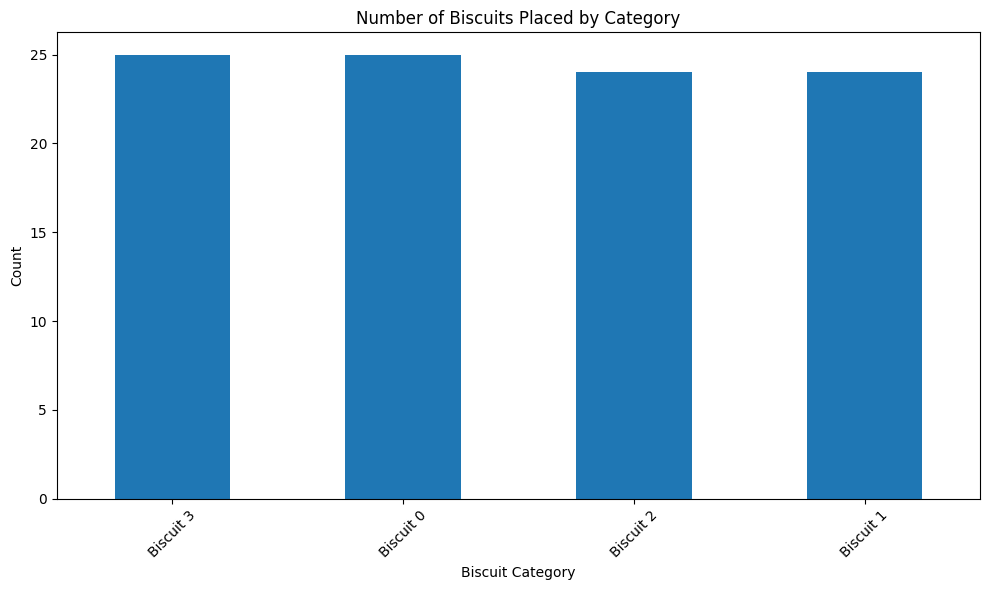

In [30]:
import matplotlib.pyplot as plt

solution_df = pd.DataFrame(greedy, columns=['BiscuitType', 'Position','Value'])


biscuit_counts = solution_df['BiscuitType'].value_counts()


plt.figure(figsize=(10, 6))
biscuit_counts.plot(kind='bar')
plt.title('Number of Biscuits Placed by Category')
plt.xlabel('Biscuit Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

How to define a population ?

In [ ]:
population_size = 10
problem = BiscuitPlacementProblem(500, "/content/sample_data/defects.csv")


Genetic Algorithm

In [33]:
import pandas as pd
import random

def create_random_arrangement(problem):
    arrangement = []
    position = 0
    while position < problem.roll_length:
        biscuit_type = random.choice(problem.biscuit_types)
        if problem.is_valid_placement(position, biscuit_type):
            arrangement.append((biscuit_type, position))
            position += biscuit_type.length
        else:
            position += 1
    return arrangement


def fitness(arrangement, problem):
    problem.placed_biscuits.clear()  # Clear previous biscuits
    for biscuit_type, pos in arrangement:
        problem.place_biscuit(biscuit_type, pos)
    return problem.total_value()


def initialize_population(problem, population_size):
    return [create_random_arrangement(problem) for _ in range(population_size)]


def select_fittest(population, problem, num_parents):
    fitness_scores = [(fitness(arrangement, problem), arrangement) for arrangement in population]
    sorted_by_fitness = sorted(fitness_scores, key=lambda x: x[0], reverse=True)
    return [arrangement for _, arrangement in sorted_by_fitness[:num_parents]]


def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return [child1, child2]


def mutate(arrangement, mutation_rate, problem):

    new_arrangement = arrangement.copy()
    for i in range(len(new_arrangement)):
        if random.random() < mutation_rate:
            biscuit_type, current_position = new_arrangement[i]
            new_position = random.randint(0, problem.roll_length - biscuit_type.length)
            problem.placed_biscuits = [b for b in problem.placed_biscuits if b.position != current_position]
            if problem.is_valid_placement(new_position, biscuit_type):
                new_arrangement[i] = (biscuit_type, new_position)

                problem.place_biscuit(biscuit_type, new_position)
    return new_arrangement



def genetic_algorithm(problem, population_size, num_generations, mutation_rate):
    population = initialize_population(problem, population_size)
    for _ in range(num_generations):
        parents = select_fittest(population, problem, population_size // 2)

        next_generation = []
        for i in range(0, len(parents), 2):
            if i+1 < len(parents):
                next_generation.extend(crossover(parents[i], parents[i+1]))

        for individual in next_generation:
            if random.random() < mutation_rate:
                mutate(individual, mutation_rate, problem)

        population = next_generation + parents

    return select_fittest(population, problem, 1)[0]



roll_length = 500
biscuit_types = [
    Biscuit('Biscuit 0', 4, 6, {'a': 4, 'b': 2, 'c': 3}),
    Biscuit('Biscuit 1', 8, 12, {'a': 5, 'b': 4, 'c': 4}),
    Biscuit('Biscuit 2', 2, 1, {'a': 1, 'b': 2, 'c': 1}),
    Biscuit('Biscuit 3', 5, 8, {'a': 2, 'b': 3, 'c': 2}),
]

problem = BiscuitPlacementProblem(500, "/content/sample_data/defects.csv")
for biscuit in biscuit_types:
    problem.add_biscuit_type(biscuit)


best_solution = genetic_algorithm(problem, population_size=100, num_generations=1000, mutation_rate=0.01)
problem.display_rolls_and_biscuits()
#genetic = problem.return_rolls_and_biscuits()
#print(genetic)


[('Biscuit 0', 1, 6), ('Biscuit 2', 5, 1), ('Biscuit 1', 8, 12), ('Biscuit 0', 16, 6), ('Biscuit 0', 20, 6), ('Biscuit 1', 24, 12), ('Biscuit 2', 34, 1), ('Biscuit 0', 36, 6), ('Biscuit 0', 40, 6), ('Biscuit 0', 44, 6), ('Biscuit 0', 50, 6), ('Biscuit 1', 54, 12), ('Biscuit 1', 62, 12), ('Biscuit 0', 70, 6), ('Biscuit 1', 74, 12), ('Biscuit 1', 83, 12), ('Biscuit 0', 91, 6), ('Biscuit 0', 98, 6), ('Biscuit 0', 102, 6), ('Biscuit 0', 108, 6), ('Biscuit 0', 114, 6), ('Biscuit 2', 119, 1), ('Biscuit 2', 121, 1), ('Biscuit 1', 123, 12), ('Biscuit 1', 131, 12), ('Biscuit 0', 141, 6), ('Biscuit 1', 145, 12), ('Biscuit 2', 154, 1), ('Biscuit 1', 158, 12), ('Biscuit 3', 167, 8), ('Biscuit 2', 172, 1), ('Biscuit 0', 174, 6), ('Biscuit 0', 179, 6), ('Biscuit 1', 188, 12), ('Biscuit 3', 196, 8), ('Biscuit 1', 201, 12), ('Biscuit 3', 209, 8), ('Biscuit 1', 214, 12), ('Biscuit 2', 222, 1), ('Biscuit 0', 224, 6), ('Biscuit 1', 228, 12), ('Biscuit 1', 236, 12), ('Biscuit 0', 244, 6), ('Biscuit 1', 24

Let's analyze the distribution of the placed biscuits with Genetic Algorithm.

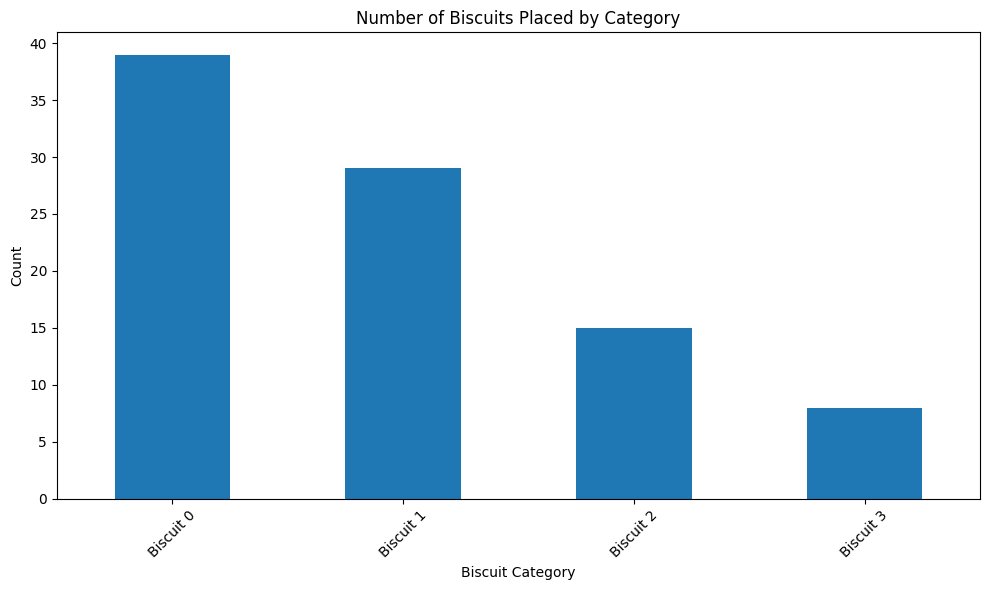

In [34]:
solution_df = pd.DataFrame(genetic, columns=['BiscuitType', 'Position','Value'])


biscuit_counts = solution_df['BiscuitType'].value_counts()

plt.figure(figsize=(10, 6))
biscuit_counts.plot(kind='bar')
plt.title('Number of Biscuits Placed by Category')
plt.xlabel('Biscuit Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()